In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,RandomForestClassifier
from sklearn.linear_model import SGDClassifier
#from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

In [3]:
col_names = ["duration","protocol","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
            "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
            "num_shells","num_access_files","num_outbound_cmds","is_hot_logins","is_giest_login","count","srv_count",
             "serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
            "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
            "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
            "class","difficulty_score"]
df_train = pd.read_csv("./train.csv",header=None, names=col_names)
df_test = pd.read_csv("./test.csv",header=None, names=col_names)

#Apply dataset balancing
'''df_major = df_train[(df_train["class"]=="nomral")|(df_train["class"]=="dos")|(df_train["class"]=="probe")]
df_major = df_train.sample(n=17672)
df_minor = df_train[(df_train["class"]=="r2l")|(df_train["class"]=="u2r")]
df_train = pd.concat([df_major, df_minor])
print(df_minor.shape[0])
print(df_major.shape[0])
print(df_train.shape[0])'''

'df_major = df_train[(df_train["class"]=="nomral")|(df_train["class"]=="dos")|(df_train["class"]=="probe")]\ndf_major = df_train.sample(n=17672)\ndf_minor = df_train[(df_train["class"]=="r2l")|(df_train["class"]=="u2r")]\ndf_train = pd.concat([df_major, df_minor])\nprint(df_minor.shape[0])\nprint(df_major.shape[0])\nprint(df_train.shape[0])'

In [4]:
df_train['protocol'] = df_train['protocol'].astype('category')
df_train['protocol']= df_train['protocol'].cat.codes
df_train['service'] = df_train['service'].astype('category')
df_train['service']= df_train['service'].cat.codes
df_train['flag'] = df_train['flag'].astype('category')
df_train['flag']= df_train['flag'].cat.codes

df_test['protocol'] = df_test['protocol'].astype('category')
df_test['protocol']= df_test['protocol'].cat.codes
df_test['service'] = df_test['service'].astype('category')
df_test['service']= df_test['service'].cat.codes
df_test['flag'] = df_test['flag'].astype('category')
df_test['flag']= df_test['flag'].cat.codes

y_train = df_train.iloc[:, 41]
y_test = df_test.iloc[:,41]
x_train = df_train.iloc[:,0:41]
x_test = df_test.iloc[:,0:41]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
 {'criterion': 'entropy', 'min_samples_split': 2}
total accuracy: 0.7623757984386089
dos accuracy: 0.8153660498793243
normal accuracy 0.9693131500360416
probe accuracy 0.6100784799669559
r2l accuracy 0.08144087705559906
u2r accuracy 0.02


/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report
              precision    recall  f1-score   support

         dos       0.96      0.82      0.88      7458
      normal       0.67      0.97      0.79      9711
       probe       0.74      0.61      0.67      2421
         r2l       0.95      0.08      0.15      2554
         u2r       0.57      0.02      0.04       400

    accuracy                           0.76     22544
   macro avg       0.78      0.50      0.51     22544
weighted avg       0.80      0.76      0.72     22544



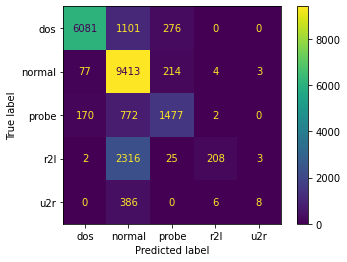

In [10]:
# Decision-tree Classifier
dt_params = {'criterion' : ['gini', 'entropy'],
             'min_samples_split' : [2, 4, 6, 8, 10]}

dt_clf = DecisionTreeClassifier()
dt_gscv = GridSearchCV(dt_clf, dt_params, n_jobs=-1, verbose=10)

dt_gscv.fit(x_train, y_train)
best_dt_clf = dt_gscv.best_estimator_
best_dt_params = dt_gscv.best_params_

dump(best_dt_clf, 'best_dt_clf.joblib')

print("Best Hyperparameters:\n", best_dt_params)
y_pred = best_dt_clf.predict(x_test)
print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))

plot_confusion_matrix(best_dt_clf, x_test, y_test)

print("Classification Report")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters:
 {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 200}
total accuracy: 0.7422374024130589
dos accuracy: 0.7692410834003754
normal accuracy 0.9726083822469365
probe accuracy 0.630731102850062
r2l accuracy 0.009005481597494126
u2r accuracy 0.0025


/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report
              precision    recall  f1-score   support

         dos       0.96      0.77      0.85      7458
      normal       0.64      0.97      0.77      9711
       probe       0.86      0.63      0.73      2421
         r2l       0.96      0.01      0.02      2554
         u2r       0.50      0.00      0.00       400

    accuracy                           0.74     22544
   macro avg       0.78      0.48      0.48     22544
weighted avg       0.80      0.74      0.70     22544



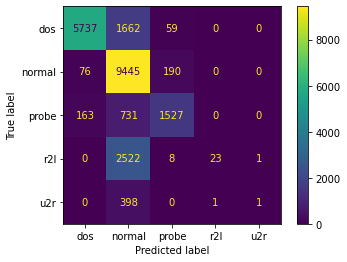

[CV 1/5; 1/10] START criterion=gini, min_samples_split=2........................
[CV 1/5; 1/10] END criterion=gini, min_samples_split=2;, score=0.998 total time=   1.8s
[CV 5/5; 2/10] START criterion=gini, min_samples_split=4........................
[CV 5/5; 2/10] END criterion=gini, min_samples_split=4;, score=0.997 total time=   1.4s
[CV 4/5; 4/10] START criterion=gini, min_samples_split=8........................
[CV 4/5; 4/10] END criterion=gini, min_samples_split=8;, score=0.998 total time=   1.5s
[CV 1/5; 6/10] START criterion=entropy, min_samples_split=2.....................
[CV 1/5; 6/10] END criterion=entropy, min_samples_split=2;, score=0.997 total time=   1.1s
[CV 4/5; 7/10] START criterion=entropy, min_samples_split=4.....................
[CV 4/5; 7/10] END criterion=entropy, min_samples_split=4;, score=0.998 total time=   1.2s
[CV 4/5; 9/10] START criterion=entropy, min_samples_split=8.....................
[CV 4/5; 9/10] END criterion=entropy, min_samples_split=8;, score=0.

[CV 3/5; 2/10] START criterion=gini, min_samples_split=4........................
[CV 3/5; 2/10] END criterion=gini, min_samples_split=4;, score=0.997 total time=   1.9s
[CV 4/5; 3/10] START criterion=gini, min_samples_split=6........................
[CV 4/5; 3/10] END criterion=gini, min_samples_split=6;, score=0.998 total time=   1.4s
[CV 2/5; 5/10] START criterion=gini, min_samples_split=10.......................
[CV 2/5; 5/10] END criterion=gini, min_samples_split=10;, score=0.997 total time=   1.5s
[CV 5/5; 6/10] START criterion=entropy, min_samples_split=2.....................
[CV 5/5; 6/10] END criterion=entropy, min_samples_split=2;, score=0.998 total time=   1.1s
[CV 2/5; 8/10] START criterion=entropy, min_samples_split=6.....................
[CV 2/5; 8/10] END criterion=entropy, min_samples_split=6;, score=0.997 total time=   1.1s
[CV 5/5; 9/10] START criterion=entropy, min_samples_split=8.....................
[CV 5/5; 9/10] END criterion=entropy, min_samples_split=8;, score=0

[CV 3/5; 1/10] START criterion=gini, min_samples_split=2........................
[CV 3/5; 1/10] END criterion=gini, min_samples_split=2;, score=0.997 total time=   1.9s
[CV 1/5; 4/10] START criterion=gini, min_samples_split=8........................
[CV 1/5; 4/10] END criterion=gini, min_samples_split=8;, score=0.997 total time=   1.3s
[CV 5/5; 4/10] START criterion=gini, min_samples_split=8........................
[CV 5/5; 4/10] END criterion=gini, min_samples_split=8;, score=0.997 total time=   1.5s
[CV 4/5; 6/10] START criterion=entropy, min_samples_split=2.....................
[CV 4/5; 6/10] END criterion=entropy, min_samples_split=2;, score=0.998 total time=   1.1s
[CV 1/5; 8/10] START criterion=entropy, min_samples_split=6.....................
[CV 1/5; 8/10] END criterion=entropy, min_samples_split=6;, score=0.998 total time=   1.1s
[CV 3/5; 9/10] START criterion=entropy, min_samples_split=8.....................
[CV 3/5; 9/10] END criterion=entropy, min_samples_split=8;, score=0.

[CV 4/5; 1/10] START criterion=gini, min_samples_split=2........................
[CV 4/5; 1/10] END criterion=gini, min_samples_split=2;, score=0.998 total time=   1.8s
[CV 1/5; 3/10] START criterion=gini, min_samples_split=6........................
[CV 1/5; 3/10] END criterion=gini, min_samples_split=6;, score=0.998 total time=   1.3s
[CV 3/5; 4/10] START criterion=gini, min_samples_split=8........................
[CV 3/5; 4/10] END criterion=gini, min_samples_split=8;, score=0.997 total time=   1.5s
[CV 3/5; 6/10] START criterion=entropy, min_samples_split=2.....................
[CV 3/5; 6/10] END criterion=entropy, min_samples_split=2;, score=0.998 total time=   1.1s
[CV 5/5; 7/10] START criterion=entropy, min_samples_split=4.....................
[CV 5/5; 7/10] END criterion=entropy, min_samples_split=4;, score=0.998 total time=   1.1s
[CV 2/5; 9/10] START criterion=entropy, min_samples_split=8.....................
[CV 2/5; 9/10] END criterion=entropy, min_samples_split=8;, score=0.

In [11]:
# Random Forest Classifier
rf_params = {'criterion' : ['gini', 'entropy'],
             'min_samples_split' : [2, 4, 6,],
             'n_estimators' : [200, 400, 600, 800, 1000]}

rf_clf = RandomForestClassifier()
rf_gscv = GridSearchCV(rf_clf, rf_params, n_jobs=-1, verbose=10)

rf_gscv.fit(x_train, y_train)
best_rf_clf = rf_gscv.best_estimator_
best_rf_params = rf_gscv.best_params_

dump(best_rf_clf, 'best_rf_clf.joblib')

print("Best Hyperparameters:\n", best_rf_params)
y_pred = best_rf_clf.predict(x_test)
print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))

plot_confusion_matrix(best_rf_clf, x_test, y_test)

print("Classification Report")
print(classification_report(y_test, y_pred))




Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START learning_rate=1.0, loss=deviance, n_estimators=200.........
[CV 1/5; 1/30] END learning_rate=1.0, loss=deviance, n_estimators=200;, score=0.991 total time= 5.7min
[CV 2/5; 3/30] START learning_rate=1.0, loss=deviance, n_estimators=600.........
[CV 2/5; 3/30] END learning_rate=1.0, loss=deviance, n_estimators=600;, score=0.985 total time=17.0min
[CV 5/5; 4/30] START learning_rate=1.0, loss=deviance, n_estimators=800.........
[CV 5/5; 4/30] END learning_rate=1.0, loss=deviance, n_estimators=800;, score=0.995 total time=24.0min
[CV 3/5; 11/30] START learning_rate=0.1, loss=deviance, n_estimators=200........
[CV 3/5; 11/30] END learning_rate=0.1, loss=deviance, n_estimators=200;, score=0.998 total time= 6.0min
[CV 2/5; 12/30] START learning_rate=0.1, loss=deviance, n_estimators=400........
[CV 2/5; 12/30] END learning_rate=0.1, loss=deviance, n_estimators=400;, score=0.999 total time=12.8min
[CV 4/5; 13/30] 

[CV 1/5; 2/30] START learning_rate=1.0, loss=deviance, n_estimators=400.........
[CV 1/5; 2/30] END learning_rate=1.0, loss=deviance, n_estimators=400;, score=0.991 total time=11.3min
[CV 5/5; 3/30] START learning_rate=1.0, loss=deviance, n_estimators=600.........
[CV 5/5; 3/30] END learning_rate=1.0, loss=deviance, n_estimators=600;, score=0.995 total time=17.7min
[CV 3/5; 5/30] START learning_rate=1.0, loss=deviance, n_estimators=1000........
[CV 3/5; 5/30] END learning_rate=1.0, loss=deviance, n_estimators=1000;, score=0.990 total time=30.3min
[CV 1/5; 13/30] START learning_rate=0.1, loss=deviance, n_estimators=600........
[CV 1/5; 13/30] END learning_rate=0.1, loss=deviance, n_estimators=600;, score=0.999 total time=18.5min
[CV 4/5; 14/30] START learning_rate=0.1, loss=deviance, n_estimators=800........
[CV 4/5; 14/30] END learning_rate=0.1, loss=deviance, n_estimators=800;, score=0.999 total time=24.5min
[CV 3/5; 21/30] START learning_rate=0.01, loss=deviance, n_estimators=200....

/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/opt/miniconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 310, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/opt/miniconda3/lib/python3.8

[CV 4/5; 1/30] START learning_rate=1.0, loss=deviance, n_estimators=200.........
[CV 4/5; 1/30] END learning_rate=1.0, loss=deviance, n_estimators=200;, score=0.949 total time= 5.7min
[CV 3/5; 3/30] START learning_rate=1.0, loss=deviance, n_estimators=600.........
[CV 3/5; 3/30] END learning_rate=1.0, loss=deviance, n_estimators=600;, score=0.990 total time=17.2min
[CV 1/5; 5/30] START learning_rate=1.0, loss=deviance, n_estimators=1000........
[CV 1/5; 5/30] END learning_rate=1.0, loss=deviance, n_estimators=1000;, score=0.991 total time=27.5min
[CV 5/5; 11/30] START learning_rate=0.1, loss=deviance, n_estimators=200........
[CV 5/5; 11/30] END learning_rate=0.1, loss=deviance, n_estimators=200;, score=0.997 total time= 6.3min
[CV 4/5; 12/30] START learning_rate=0.1, loss=deviance, n_estimators=400........
[CV 4/5; 12/30] END learning_rate=0.1, loss=deviance, n_estimators=400;, score=0.998 total time=12.7min
[CV 1/5; 14/30] START learning_rate=0.1, loss=deviance, n_estimators=800.....

Best Hyperparameters:
 {'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 1000}
total accuracy: 0.7588271823988645
dos accuracy: 0.7860016090104586
normal accuracy 0.9716815981876222
probe accuracy 0.6600578273440727
r2l accuracy 0.0759592795614722
u2r accuracy 0.0425


/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report
              precision    recall  f1-score   support

         dos       0.96      0.79      0.86      7458
      normal       0.66      0.97      0.79      9711
       probe       0.82      0.66      0.73      2421
         r2l       0.99      0.08      0.14      2554
         u2r       0.71      0.04      0.08       400

    accuracy                           0.76     22544
   macro avg       0.83      0.51      0.52     22544
weighted avg       0.82      0.76      0.72     22544



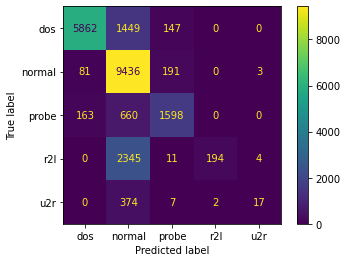

In [12]:
# GradientBoosting Classifier
gb_params = {'loss' : ['deviance', 'exponential'],
             'learning_rate' : [1.0, 0.1, 0.01],
             'n_estimators' : [200, 400, 600, 800, 1000]}

gb_clf = GradientBoostingClassifier()
gb_gscv = GridSearchCV(gb_clf, gb_params, n_jobs=-1, verbose=10)

gb_gscv.fit(x_train, y_train)
best_gb_clf = gb_gscv.best_estimator_
best_gb_params = gb_gscv.best_params_

dump(best_gb_clf, 'best_gb_clf.joblib')

print("Best Hyperparameters:\n", best_gb_params)
y_pred = best_gb_clf.predict(x_test)
print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))

plot_confusion_matrix(best_gb_clf, x_test, y_test)

print("Classification Report")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 2/30] START C=10, max_iter=1000, penalty=l2............................
[CV 1/5; 2/30] END C=10, max_iter=1000, penalty=l2;, score=0.906 total time= 2.3min
[CV 5/5; 4/30] START C=10, max_iter=3000, penalty=l2............................
[CV 5/5; 4/30] END C=10, max_iter=3000, penalty=l2;, score=0.925 total time= 6.4min
[CV 2/5; 8/30] START C=10, max_iter=7000, penalty=l2............................
[CV 2/5; 8/30] END C=10, max_iter=7000, penalty=l2;, score=0.951 total time=14.6min
[CV 5/5; 10/30] START C=10, max_iter=9000, penalty=l2...........................
[CV 5/5; 10/30] END C=10, max_iter=9000, penalty=l2;, score=0.950 total time=18.7min
[CV 2/5; 18/30] START C=1, max_iter=7000, penalty=l2............................
[CV 2/5; 18/30] END C=1, max_iter=7000, penalty=l2;, score=0.955 total time=14.5min
[CV 5/5; 20/30] START C=1, max_iter=9000, penalty=l2............................
[CV 5/5; 20/30] END C=1, max_it

/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

[CV 3/5; 1/30] START C=10, max_iter=1000, penalty=l1............................
[CV 3/5; 1/30] END C=10, max_iter=1000, penalty=l1;, score=nan total time=   0.7s
[CV 5/5; 2/30] START C=10, max_iter=1000, penalty=l2............................
[CV 5/5; 2/30] END C=10, max_iter=1000, penalty=l2;, score=0.874 total time= 2.3min
[CV 4/5; 5/30] START C=10, max_iter=5000, penalty=l1............................
[CV 4/5; 5/30] END C=10, max_iter=5000, penalty=l1;, score=nan total time=   0.5s
[CV 2/5; 6/30] START C=10, max_iter=5000, penalty=l2............................
[CV 2/5; 6/30] END C=10, max_iter=5000, penalty=l2;, score=0.935 total time=10.6min
[CV 1/5; 9/30] START C=10, max_iter=9000, penalty=l1............................
[CV 1/5; 9/30] END C=10, max_iter=9000, penalty=l1;, score=nan total time=   0.4s
[CV 2/5; 9/30] START C=10, max_iter=9000, penalty=l1............................
[CV 2/5; 9/30] END C=10, max_iter=9000, penalty=l1;, score=nan total time=   0.4s
[CV 3/5; 9/30] STA

/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

[CV 2/5; 1/30] START C=10, max_iter=1000, penalty=l1............................
[CV 2/5; 1/30] END C=10, max_iter=1000, penalty=l1;, score=nan total time=   0.7s
[CV 4/5; 2/30] START C=10, max_iter=1000, penalty=l2............................
[CV 4/5; 2/30] END C=10, max_iter=1000, penalty=l2;, score=0.917 total time= 2.3min
[CV 3/5; 5/30] START C=10, max_iter=5000, penalty=l1............................
[CV 3/5; 5/30] END C=10, max_iter=5000, penalty=l1;, score=nan total time=   0.5s
[CV 1/5; 6/30] START C=10, max_iter=5000, penalty=l2............................
[CV 1/5; 6/30] END C=10, max_iter=5000, penalty=l2;, score=0.941 total time=10.4min
[CV 4/5; 8/30] START C=10, max_iter=7000, penalty=l2............................
[CV 4/5; 8/30] END C=10, max_iter=7000, penalty=l2;, score=0.942 total time=14.7min
[CV 3/5; 12/30] START C=1, max_iter=1000, penalty=l2............................
[CV 3/5; 12/30] END C=1, max_iter=1000, penalty=l2;, score=0.930 total time= 2.2min
[CV 1/5; 13/30

/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

[CV 4/5; 1/30] START C=10, max_iter=1000, penalty=l1............................
[CV 4/5; 1/30] END C=10, max_iter=1000, penalty=l1;, score=nan total time=   0.7s
[CV 3/5; 3/30] START C=10, max_iter=3000, penalty=l1............................
[CV 3/5; 3/30] END C=10, max_iter=3000, penalty=l1;, score=nan total time=   0.5s
[CV 1/5; 4/30] START C=10, max_iter=3000, penalty=l2............................
[CV 1/5; 4/30] END C=10, max_iter=3000, penalty=l2;, score=0.947 total time= 6.5min
[CV 4/5; 6/30] START C=10, max_iter=5000, penalty=l2............................
[CV 4/5; 6/30] END C=10, max_iter=5000, penalty=l2;, score=0.944 total time=10.6min
[CV 3/5; 10/30] START C=10, max_iter=9000, penalty=l2...........................
[CV 3/5; 10/30] END C=10, max_iter=9000, penalty=l2;, score=0.958 total time=18.8min
[CV 1/5; 15/30] START C=1, max_iter=5000, penalty=l1............................
[CV 1/5; 15/30] END C=1, max_iter=5000, penalty=l1;, score=nan total time=   0.5s
[CV 2/5; 15/30]

/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

[CV 1/5; 1/30] START C=10, max_iter=1000, penalty=l1............................
[CV 1/5; 1/30] END C=10, max_iter=1000, penalty=l1;, score=nan total time=   0.7s
[CV 1/5; 3/30] START C=10, max_iter=3000, penalty=l1............................
[CV 1/5; 3/30] END C=10, max_iter=3000, penalty=l1;, score=nan total time=   0.5s
[CV 4/5; 3/30] START C=10, max_iter=3000, penalty=l1............................
[CV 4/5; 3/30] END C=10, max_iter=3000, penalty=l1;, score=nan total time=   0.5s
[CV 2/5; 4/30] START C=10, max_iter=3000, penalty=l2............................
[CV 2/5; 4/30] END C=10, max_iter=3000, penalty=l2;, score=0.936 total time= 6.5min
[CV 5/5; 6/30] START C=10, max_iter=5000, penalty=l2............................
[CV 5/5; 6/30] END C=10, max_iter=5000, penalty=l2;, score=0.942 total time=10.6min
[CV 2/5; 10/30] START C=10, max_iter=9000, penalty=l2...........................
[CV 2/5; 10/30] END C=10, max_iter=9000, penalty=l2;, score=0.944 total time=18.8min
[CV 5/5; 14/30]

/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

[CV 2/5; 2/30] START C=10, max_iter=1000, penalty=l2............................
[CV 2/5; 2/30] END C=10, max_iter=1000, penalty=l2;, score=0.871 total time= 2.3min
[CV 1/5; 5/30] START C=10, max_iter=5000, penalty=l1............................
[CV 1/5; 5/30] END C=10, max_iter=5000, penalty=l1;, score=nan total time=   0.4s
[CV 2/5; 5/30] START C=10, max_iter=5000, penalty=l1............................
[CV 2/5; 5/30] END C=10, max_iter=5000, penalty=l1;, score=nan total time=   0.4s
[CV 5/5; 5/30] START C=10, max_iter=5000, penalty=l1............................
[CV 5/5; 5/30] END C=10, max_iter=5000, penalty=l1;, score=nan total time=   0.5s
[CV 3/5; 6/30] START C=10, max_iter=5000, penalty=l2............................
[CV 3/5; 6/30] END C=10, max_iter=5000, penalty=l2;, score=0.900 total time=10.6min
[CV 5/5; 8/30] START C=10, max_iter=7000, penalty=l2............................
[CV 5/5; 8/30] END C=10, max_iter=7000, penalty=l2;, score=0.938 total time=14.7min
[CV 4/5; 12/30] 

/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

[CV 3/5; 2/30] START C=10, max_iter=1000, penalty=l2............................
[CV 3/5; 2/30] END C=10, max_iter=1000, penalty=l2;, score=0.868 total time= 2.3min
[CV 4/5; 4/30] START C=10, max_iter=3000, penalty=l2............................
[CV 4/5; 4/30] END C=10, max_iter=3000, penalty=l2;, score=0.914 total time= 6.4min
[CV 3/5; 8/30] START C=10, max_iter=7000, penalty=l2............................
[CV 3/5; 8/30] END C=10, max_iter=7000, penalty=l2;, score=0.834 total time=14.7min
[CV 1/5; 11/30] START C=1, max_iter=1000, penalty=l1............................
[CV 1/5; 11/30] END C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.4s
[CV 2/5; 11/30] START C=1, max_iter=1000, penalty=l1............................
[CV 2/5; 11/30] END C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.4s
[CV 3/5; 11/30] START C=1, max_iter=1000, penalty=l1............................
[CV 3/5; 11/30] END C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.4s
[CV 4/5; 11/30] 

/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

[CV 5/5; 1/30] START C=10, max_iter=1000, penalty=l1............................
[CV 5/5; 1/30] END C=10, max_iter=1000, penalty=l1;, score=nan total time=   0.8s
[CV 2/5; 3/30] START C=10, max_iter=3000, penalty=l1............................
[CV 2/5; 3/30] END C=10, max_iter=3000, penalty=l1;, score=nan total time=   0.4s
[CV 5/5; 3/30] START C=10, max_iter=3000, penalty=l1............................
[CV 5/5; 3/30] END C=10, max_iter=3000, penalty=l1;, score=nan total time=   0.5s
[CV 3/5; 4/30] START C=10, max_iter=3000, penalty=l2............................
[CV 3/5; 4/30] END C=10, max_iter=3000, penalty=l2;, score=0.930 total time= 6.5min
[CV 1/5; 7/30] START C=10, max_iter=7000, penalty=l1............................
[CV 1/5; 7/30] END C=10, max_iter=7000, penalty=l1;, score=nan total time=   0.4s
[CV 2/5; 7/30] START C=10, max_iter=7000, penalty=l1............................
[CV 2/5; 7/30] END C=10, max_iter=7000, penalty=l1;, score=nan total time=   0.4s
[CV 3/5; 7/30] START

/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

Best Hyperparameters:
 {'C': 0.1, 'max_iter': 7000, 'penalty': 'l2'}
total accuracy: 0.7031582682753726
dos accuracy: 0.6899973183159024
normal accuracy 0.9269900113273607
probe accuracy 0.7026022304832714
r2l accuracy 0.0011746280344557558
u2r accuracy 0.0
Classification Report
              precision    recall  f1-score   support

         dos       0.96      0.69      0.80      7458
      normal       0.62      0.93      0.74      9711
       probe       0.65      0.70      0.67      2421
         r2l       0.60      0.00      0.00      2554
         u2r       0.00      0.00      0.00       400

    accuracy                           0.70     22544
   macro avg       0.56      0.46      0.44     22544
weighted avg       0.72      0.70      0.66     22544



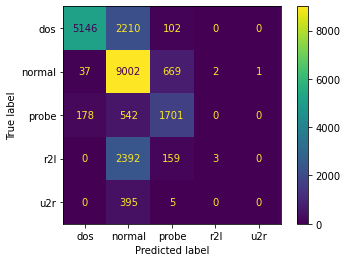

In [13]:
# SVM Classifier
svc_params = {'penalty' : ['l1', 'l2'],
             'C' : [10, 1, 0.1],
             'max_iter' : [1000, 3000, 5000, 7000, 9000]}

svc_clf = LinearSVC()
svc_gscv = GridSearchCV(svc_clf, svc_params, n_jobs=-1, verbose=10)

svc_gscv.fit(x_train, y_train)
best_svc_clf = svc_gscv.best_estimator_
best_svc_params = svc_gscv.best_params_

dump(best_svc_clf, 'best_svc_clf.joblib')

print("Best Hyperparameters:\n", best_svc_params)
y_pred = best_svc_clf.predict(x_test)
print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))

plot_confusion_matrix(best_svc_clf, x_test, y_test)

print("Classification Report")
print(classification_report(y_test, y_pred))

[Voting] ....................... (1 of 4) Processing dt, total=   0.7s
[Voting] ....................... (2 of 4) Processing rf, total=  18.6s
[Voting] ...................... (4 of 4) Processing svc, total= 9.2min


/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


total accuracy: 0.745431156848829
dos accuracy: 0.7841244301421293
normal accuracy 0.9714756461744414
probe accuracy 0.6195786864931846
r2l accuracy 0.009005481597494126
u2r accuracy 0.0


/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report
              precision    recall  f1-score   support

         dos       0.96      0.78      0.86      7458
      normal       0.64      0.97      0.77      9711
       probe       0.86      0.62      0.72      2421
         r2l       1.00      0.01      0.02      2554
         u2r       0.00      0.00      0.00       400

    accuracy                           0.75     22544
   macro avg       0.69      0.48      0.47     22544
weighted avg       0.80      0.75      0.70     22544



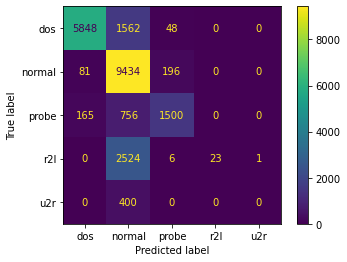

[Voting] ....................... (3 of 4) Processing gb, total=17.3min


In [14]:
clf_list = [('dt', best_dt_clf), ('rf', best_rf_clf), ('gb', best_gb_clf), ('svc', best_svc_clf)]
vote_clf = VotingClassifier(estimators = clf_list, n_jobs=-1, verbose=10)
vote_clf.fit(x_train, y_train)

dump(vote_clf, 'vote_clf.joblib')

y_pred = vote_clf.predict(x_test)
print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))

plot_confusion_matrix(vote_clf, x_test, y_test)

print("Classification Report")
print(classification_report(y_test, y_pred))

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense


df_train['class'] = df_train['class'].astype('category')
df_train['class']= df_train['class'].cat.codes

df_test['class'] = df_test['class'].astype('category')
df_test['class']= df_test['class'].cat.codes

y_test = df_test.iloc[:,41]
y_train = df_train.iloc[:, 41]

model = Sequential()
model.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units= 5, activation = 'softmax'))
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train, 
          epochs=200, 
          batch_size=64,
          validation_data=(x_test, y_test))

model.save('model')

2022-04-12 20:16:25.015415: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-12 20:16:25.016097: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-12 20:16:25.154728: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/200
1969/1969 [==============================] - 3s 1ms/step - loss: 0.6377 - accuracy: 0.8185 - val_loss: 1.6373 - val_accuracy: 0.6741
Epoch 2/200
1969/1969 [==============================] - 2s 976us/step - loss: 0.1848 - accuracy: 0.9470 - val_loss: 1.5156 - val_accuracy: 0.6882
Epoch 3/200
1969/1969 [==============================] - 2s 1ms/step - loss: 0.1430 - accuracy: 0.9583 - val_loss: 1.7345 - val_accuracy: 0.6960
Epoch 4/200
1969/1969 [==============================] - 2s 983us/step - loss: 0.1262 - accuracy: 0.9653 - val_loss: 1.6964 - val_accuracy: 0.6888
Epoch 5/200
1969/1969 [==============================] - 2s 976us/step - loss: 0.1127 - accuracy: 0.9683 - val_loss: 1.5514 - val_accuracy: 0.6917
Epoch 6/200
1969/1969 [==============================] - 2s 986us/step - loss: 0.1195 - accuracy: 0.9660 - val_loss: 1.7517 - val_accuracy: 0.7017
Epoch 7/200
1969/1969 [==============================] - 2s 983us/step - loss: 0.1068 - accuracy: 0.9702 - val_loss: 1.560

1969/1969 [==============================] - 2s 938us/step - loss: 0.0526 - accuracy: 0.9854 - val_loss: 1.9228 - val_accuracy: 0.7242
Epoch 57/200
1969/1969 [==============================] - 2s 940us/step - loss: 0.0559 - accuracy: 0.9850 - val_loss: 1.9372 - val_accuracy: 0.7202
Epoch 58/200
1969/1969 [==============================] - 2s 929us/step - loss: 0.0542 - accuracy: 0.9854 - val_loss: 1.9027 - val_accuracy: 0.7083
Epoch 59/200
1969/1969 [==============================] - 2s 933us/step - loss: 0.0468 - accuracy: 0.9872 - val_loss: 1.9755 - val_accuracy: 0.7282
Epoch 60/200
1969/1969 [==============================] - 2s 942us/step - loss: 0.0536 - accuracy: 0.9861 - val_loss: 2.2729 - val_accuracy: 0.7204
Epoch 61/200
1969/1969 [==============================] - 2s 932us/step - loss: 0.0512 - accuracy: 0.9858 - val_loss: 2.0195 - val_accuracy: 0.7246
Epoch 62/200
1969/1969 [==============================] - 2s 936us/step - loss: 0.0501 - accuracy: 0.9858 - val_loss: 1.9075 

1969/1969 [==============================] - 2s 993us/step - loss: 0.0455 - accuracy: 0.9876 - val_loss: 1.9563 - val_accuracy: 0.7188
Epoch 112/200
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0475 - accuracy: 0.9876 - val_loss: 2.0166 - val_accuracy: 0.7272
Epoch 113/200
1969/1969 [==============================] - 2s 964us/step - loss: 0.0480 - accuracy: 0.9874 - val_loss: 1.8670 - val_accuracy: 0.7267
Epoch 114/200
1969/1969 [==============================] - 2s 969us/step - loss: 0.0434 - accuracy: 0.9884 - val_loss: 2.1443 - val_accuracy: 0.7236
Epoch 115/200
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0471 - accuracy: 0.9871 - val_loss: 1.8771 - val_accuracy: 0.7261
Epoch 116/200
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0433 - accuracy: 0.9881 - val_loss: 1.8676 - val_accuracy: 0.7279
Epoch 117/200
1969/1969 [==============================] - 2s 977us/step - loss: 0.0490 - accuracy: 0.9867 - val_loss: 2.1732 

1969/1969 [==============================] - 2s 946us/step - loss: 0.0419 - accuracy: 0.9888 - val_loss: 2.0483 - val_accuracy: 0.7239
Epoch 167/200
1969/1969 [==============================] - 2s 934us/step - loss: 0.0419 - accuracy: 0.9887 - val_loss: 2.0229 - val_accuracy: 0.7295
Epoch 168/200
1969/1969 [==============================] - 2s 942us/step - loss: 0.0367 - accuracy: 0.9900 - val_loss: 1.9419 - val_accuracy: 0.7314
Epoch 169/200
1969/1969 [==============================] - 2s 933us/step - loss: 0.0444 - accuracy: 0.9887 - val_loss: 1.8228 - val_accuracy: 0.7127
Epoch 170/200
1969/1969 [==============================] - 2s 943us/step - loss: 0.0377 - accuracy: 0.9895 - val_loss: 1.8580 - val_accuracy: 0.7272
Epoch 171/200
1969/1969 [==============================] - 2s 950us/step - loss: 0.0415 - accuracy: 0.9892 - val_loss: 1.9236 - val_accuracy: 0.7242
Epoch 172/200
1969/1969 [==============================] - 2s 932us/step - loss: 0.0416 - accuracy: 0.9888 - val_loss: 1

2022-04-12 20:22:53.552420: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/assets


In [6]:
y_result = model.predict_classes(x_test, verbose=1)
y_pred = []
for label in y_result:
    if label == 0:
        y_pred.append(0)
    elif label == 1:
        y_pred.append(1)
    elif label == 2:
        y_pred.append(2)
    elif label == 3:
        y_pred.append(3)
    else:
        y_pred.append(4)

print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print(result)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))
print("Classification Report")
print(classification_report(y_test, y_pred))

113/705 [===>..........................] - ETA: 0s 

/opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


705/705 [==============================] - 0s 418us/step
total accuracy: 0.7246717530163236
[[5454 1902  102    0    0]
 [  52 9449  209    1    0]
 [ 155  833 1433    0    0]
 [   0 2543   10    1    0]
 [   0  400    0    0    0]]
dos accuracy: 0.7312952534191473
normal accuracy 0.9730202862732983
probe accuracy 0.5919041718298224
r2l accuracy 0.00039154267815191856
u2r accuracy 0.0
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7458
           1       0.62      0.97      0.76      9711
           2       0.82      0.59      0.69      2421
           3       0.50      0.00      0.00      2554
           4       0.00      0.00      0.00       400

    accuracy                           0.72     22544
   macro avg       0.58      0.46      0.46     22544
weighted avg       0.73      0.72      0.68     22544



/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
model1 = Sequential()
model1.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(units= 5, activation = 'softmax'))
model1.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model1.fit(x_train, y_train, 
          epochs=200, 
          batch_size=64,
          validation_data=(x_test, y_test))

model1.save('model1')

Epoch 1/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.6473 - accuracy: 0.8135 - val_loss: 1.3861 - val_accuracy: 0.6614
Epoch 2/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.2385 - accuracy: 0.9255 - val_loss: 1.3226 - val_accuracy: 0.6752
Epoch 3/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.1666 - accuracy: 0.9502 - val_loss: 1.4508 - val_accuracy: 0.6774
Epoch 4/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.1437 - accuracy: 0.9589 - val_loss: 1.5514 - val_accuracy: 0.6903
Epoch 5/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.1191 - accuracy: 0.9672 - val_loss: 1.4630 - val_accuracy: 0.6901
Epoch 6/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.1137 - accuracy: 0.9674 - val_loss: 1.4247 - val_accuracy: 0.7198
Epoch 7/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.1030 - accuracy: 0.9706 - val_loss: 1.5540 - val_ac

1969/1969 [==============================] - 3s 2ms/step - loss: 0.0479 - accuracy: 0.9870 - val_loss: 1.6949 - val_accuracy: 0.7043
Epoch 58/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0447 - accuracy: 0.9878 - val_loss: 1.6820 - val_accuracy: 0.6942
Epoch 59/200
1969/1969 [==============================] - 4s 2ms/step - loss: 0.0445 - accuracy: 0.9879 - val_loss: 1.7311 - val_accuracy: 0.7162
Epoch 60/200
1969/1969 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9877 - val_loss: 1.8655 - val_accuracy: 0.7048
Epoch 61/200
1969/1969 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9881 - val_loss: 1.7398 - val_accuracy: 0.7136
Epoch 62/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0467 - accuracy: 0.9879 - val_loss: 1.7934 - val_accuracy: 0.6912
Epoch 63/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9880 - val_loss: 1.6957 - val_accuracy

1969/1969 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9910 - val_loss: 1.6504 - val_accuracy: 0.7023
Epoch 114/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9901 - val_loss: 1.5167 - val_accuracy: 0.7275
Epoch 115/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9903 - val_loss: 1.6818 - val_accuracy: 0.7090
Epoch 116/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9910 - val_loss: 1.6975 - val_accuracy: 0.7017
Epoch 117/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0367 - accuracy: 0.9902 - val_loss: 1.7759 - val_accuracy: 0.6888
Epoch 118/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0376 - accuracy: 0.9900 - val_loss: 1.5557 - val_accuracy: 0.6987
Epoch 119/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0382 - accuracy: 0.9898 - val_loss: 1.6909 - val_ac

Epoch 169/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0321 - accuracy: 0.9915 - val_loss: 1.5311 - val_accuracy: 0.7293
Epoch 170/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0331 - accuracy: 0.9913 - val_loss: 1.4697 - val_accuracy: 0.7552
Epoch 171/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 0.9911 - val_loss: 1.4838 - val_accuracy: 0.7574
Epoch 172/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9908 - val_loss: 1.4942 - val_accuracy: 0.7176
Epoch 173/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9914 - val_loss: 1.4524 - val_accuracy: 0.7173
Epoch 174/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0323 - accuracy: 0.9919 - val_loss: 1.5871 - val_accuracy: 0.7272
Epoch 175/200
1969/1969 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 0.9912 - val_loss: 1

In [8]:
y_result = model1.predict_classes(x_test, verbose=1)
y_pred = []
for label in y_result:
    if label == 0:
        y_pred.append(0)
    elif label == 1:
        y_pred.append(1)
    elif label == 2:
        y_pred.append(2)
    elif label == 3:
        y_pred.append(3)
    else:
        y_pred.append(4)

print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print(result)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))
print("Classification Report")
print(classification_report(y_test, y_pred))

 90/705 [==>...........................] - ETA: 0s 

/opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


705/705 [==============================] - 0s 510us/step
total accuracy: 0.7263129879347054
[[5222 1725  511    0    0]
 [  44 9446  221    0    0]
 [ 289  426 1706    0    0]
 [   1 2487   66    0    0]
 [   0  399    1    0    0]]
dos accuracy: 0.700187717886833
normal accuracy 0.972711358253527
probe accuracy 0.704667492771582
r2l accuracy 0.0
u2r accuracy 0.0
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      7458
           1       0.65      0.97      0.78      9711
           2       0.68      0.70      0.69      2421
           3       0.00      0.00      0.00      2554
           4       0.00      0.00      0.00       400

    accuracy                           0.73     22544
   macro avg       0.45      0.48      0.46     22544
weighted avg       0.67      0.73      0.68     22544



/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
model2 = Sequential()
model2.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(units= 5, activation = 'softmax'))
model2.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model2.fit(x_train, y_train, 
          epochs=200, 
          batch_size=64,
          validation_data=(x_test, y_test))

model2.save('model2')

Epoch 1/200
1969/1969 [==============================] - 7s 3ms/step - loss: 0.8087 - accuracy: 0.7576 - val_loss: 1.3653 - val_accuracy: 0.6396
Epoch 2/200
1969/1969 [==============================] - 5s 3ms/step - loss: 0.2989 - accuracy: 0.9076 - val_loss: 1.2786 - val_accuracy: 0.6812
Epoch 3/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.2122 - accuracy: 0.9377 - val_loss: 1.3190 - val_accuracy: 0.7013
Epoch 4/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.1727 - accuracy: 0.9522 - val_loss: 1.4014 - val_accuracy: 0.6934
Epoch 5/200
1969/1969 [==============================] - 5s 3ms/step - loss: 0.1557 - accuracy: 0.9570 - val_loss: 1.3861 - val_accuracy: 0.6953
Epoch 6/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.1354 - accuracy: 0.9636 - val_loss: 1.5606 - val_accuracy: 0.6605
Epoch 7/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.1354 - accuracy: 0.9627 - val_loss: 1.5976 - val_ac

1969/1969 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9863 - val_loss: 1.5736 - val_accuracy: 0.6986
Epoch 58/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0514 - accuracy: 0.9859 - val_loss: 1.7271 - val_accuracy: 0.6973
Epoch 59/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0538 - accuracy: 0.9857 - val_loss: 1.8010 - val_accuracy: 0.6930
Epoch 60/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0543 - accuracy: 0.9856 - val_loss: 1.9203 - val_accuracy: 0.7069
Epoch 61/200
1969/1969 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9868 - val_loss: 1.7680 - val_accuracy: 0.6985
Epoch 62/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0534 - accuracy: 0.9865 - val_loss: 1.7580 - val_accuracy: 0.6994
Epoch 63/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0518 - accuracy: 0.9863 - val_loss: 1.5875 - val_accuracy

1969/1969 [==============================] - 5s 3ms/step - loss: 0.0418 - accuracy: 0.9896 - val_loss: 1.7455 - val_accuracy: 0.7135
Epoch 114/200
1969/1969 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9895 - val_loss: 1.6859 - val_accuracy: 0.7096
Epoch 115/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0454 - accuracy: 0.9885 - val_loss: 1.7586 - val_accuracy: 0.7160
Epoch 116/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0424 - accuracy: 0.9892 - val_loss: 1.5265 - val_accuracy: 0.7289
Epoch 117/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0431 - accuracy: 0.9883 - val_loss: 1.8459 - val_accuracy: 0.7091
Epoch 118/200
1969/1969 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9891 - val_loss: 1.7088 - val_accuracy: 0.7203
Epoch 119/200
1969/1969 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9888 - val_loss: 1.6689 - val_ac

Epoch 169/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0377 - accuracy: 0.9904 - val_loss: 1.7591 - val_accuracy: 0.7127
Epoch 170/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0385 - accuracy: 0.9903 - val_loss: 1.6569 - val_accuracy: 0.7236
Epoch 171/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0376 - accuracy: 0.9902 - val_loss: 1.6241 - val_accuracy: 0.7297
Epoch 172/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0384 - accuracy: 0.9906 - val_loss: 1.6275 - val_accuracy: 0.7270
Epoch 173/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0412 - accuracy: 0.9898 - val_loss: 1.6452 - val_accuracy: 0.7235
Epoch 174/200
1969/1969 [==============================] - 5s 2ms/step - loss: 0.0379 - accuracy: 0.9898 - val_loss: 1.5589 - val_accuracy: 0.7323
Epoch 175/200
1969/1969 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9905 - val_loss: 1

In [10]:
y_result = model2.predict_classes(x_test, verbose=1)
y_pred = []
for label in y_result:
    if label == 0:
        y_pred.append(0)
    elif label == 1:
        y_pred.append(1)
    elif label == 2:
        y_pred.append(2)
    elif label == 3:
        y_pred.append(3)
    else:
        y_pred.append(4)

print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print(result)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))
print("Classification Report")
print(classification_report(y_test, y_pred))

  1/705 [..............................] - ETA: 1:19

/opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


705/705 [==============================] - 1s 705us/step
total accuracy: 0.7172196593328601
[[4965 2319  174    0    0]
 [  36 9448  227    0    0]
 [ 134  531 1756    0    0]
 [   0 2351  203    0    0]
 [   0  400    0    0    0]]
dos accuracy: 0.665728077232502
normal accuracy 0.9729173102667078
probe accuracy 0.7253201156546881
r2l accuracy 0.0
u2r accuracy 0.0
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      7458
           1       0.63      0.97      0.76      9711
           2       0.74      0.73      0.73      2421
           3       0.00      0.00      0.00      2554
           4       0.00      0.00      0.00       400

    accuracy                           0.72     22544
   macro avg       0.47      0.47      0.46     22544
weighted avg       0.67      0.72      0.67     22544



/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
model3 = Sequential()
model3.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(units= 5, activation = 'softmax'))
model3.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model3.fit(x_train, y_train, 
          epochs=200, 
          batch_size=64,
          validation_data=(x_test, y_test))

model3.save('model3')

Epoch 1/200
1969/1969 [==============================] - 8s 3ms/step - loss: 0.9907 - accuracy: 0.6830 - val_loss: 1.5122 - val_accuracy: 0.6265
Epoch 2/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.3474 - accuracy: 0.8957 - val_loss: 1.3209 - val_accuracy: 0.6908
Epoch 3/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9188 - val_loss: 1.3034 - val_accuracy: 0.6976
Epoch 4/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.2102 - accuracy: 0.9399 - val_loss: 1.4813 - val_accuracy: 0.6985
Epoch 5/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.1833 - accuracy: 0.9498 - val_loss: 1.3786 - val_accuracy: 0.6920
Epoch 6/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.1575 - accuracy: 0.9581 - val_loss: 1.5313 - val_accuracy: 0.7042
Epoch 7/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.1382 - accuracy: 0.9640 - val_loss: 1.4285 - val_ac

1969/1969 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9840 - val_loss: 1.3971 - val_accuracy: 0.6994
Epoch 58/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0614 - accuracy: 0.9835 - val_loss: 1.8703 - val_accuracy: 0.6989
Epoch 59/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9841 - val_loss: 1.8063 - val_accuracy: 0.7003
Epoch 60/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0576 - accuracy: 0.9855 - val_loss: 1.7369 - val_accuracy: 0.7031
Epoch 61/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9851 - val_loss: 1.7815 - val_accuracy: 0.6925
Epoch 62/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9846 - val_loss: 1.5740 - val_accuracy: 0.7072
Epoch 63/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0582 - accuracy: 0.9845 - val_loss: 1.5838 - val_accuracy

1969/1969 [==============================] - 6s 3ms/step - loss: 0.0496 - accuracy: 0.9876 - val_loss: 1.5628 - val_accuracy: 0.7186
Epoch 114/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9873 - val_loss: 1.6163 - val_accuracy: 0.7053
Epoch 115/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0482 - accuracy: 0.9882 - val_loss: 1.6772 - val_accuracy: 0.7097
Epoch 116/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0481 - accuracy: 0.9879 - val_loss: 1.6530 - val_accuracy: 0.7120
Epoch 117/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0473 - accuracy: 0.9883 - val_loss: 1.4418 - val_accuracy: 0.7142
Epoch 118/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0471 - accuracy: 0.9884 - val_loss: 1.6796 - val_accuracy: 0.6978
Epoch 119/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0482 - accuracy: 0.9874 - val_loss: 1.8577 - val_ac

Epoch 169/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0423 - accuracy: 0.9898 - val_loss: 1.7881 - val_accuracy: 0.7127
Epoch 170/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0423 - accuracy: 0.9899 - val_loss: 1.6254 - val_accuracy: 0.7160
Epoch 171/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9895 - val_loss: 1.7478 - val_accuracy: 0.6970
Epoch 172/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9892 - val_loss: 1.7748 - val_accuracy: 0.7066
Epoch 173/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9897 - val_loss: 1.5791 - val_accuracy: 0.6965
Epoch 174/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0432 - accuracy: 0.9891 - val_loss: 1.5866 - val_accuracy: 0.6967
Epoch 175/200
1969/1969 [==============================] - 6s 3ms/step - loss: 0.0436 - accuracy: 0.9889 - val_loss: 1

In [12]:
y_result = model3.predict_classes(x_test, verbose=1)
y_pred = []
for label in y_result:
    if label == 0:
        y_pred.append(0)
    elif label == 1:
        y_pred.append(1)
    elif label == 2:
        y_pred.append(2)
    elif label == 3:
        y_pred.append(3)
    else:
        y_pred.append(4)

print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print(result)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))
print("Classification Report")
print(classification_report(y_test, y_pred))

  1/705 [..............................] - ETA: 1:39

/opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


705/705 [==============================] - 1s 700us/step
total accuracy: 0.7254701916252662
[[5457 1990   11    0    0]
 [  40 9452  214    5    0]
 [ 172  805 1444    0    0]
 [   0 2548    4    2    0]
 [   0  400    0    0    0]]
dos accuracy: 0.7316975060337892
normal accuracy 0.9733292142930697
probe accuracy 0.5964477488641058
r2l accuracy 0.0007830853563038371
u2r accuracy 0.0
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7458
           1       0.62      0.97      0.76      9711
           2       0.86      0.60      0.71      2421
           3       0.29      0.00      0.00      2554
           4       0.00      0.00      0.00       400

    accuracy                           0.73     22544
   macro avg       0.55      0.46      0.46     22544
weighted avg       0.71      0.73      0.68     22544



/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
model4 = Sequential()
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units= 5, activation = 'softmax'))
model4.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model4.fit(x_train, y_train, 
          epochs=200, 
          batch_size=64,
          validation_data=(x_test, y_test))

model4.save('model4')

Epoch 1/200
1969/1969 [==============================] - 10s 4ms/step - loss: 1.2196 - accuracy: 0.5438 - val_loss: 1.5625 - val_accuracy: 0.6311
Epoch 2/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.4537 - accuracy: 0.8585 - val_loss: 1.4442 - val_accuracy: 0.6420
Epoch 3/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.3385 - accuracy: 0.8954 - val_loss: 1.3435 - val_accuracy: 0.6853
Epoch 4/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.2599 - accuracy: 0.9251 - val_loss: 1.3409 - val_accuracy: 0.6845
Epoch 5/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.2152 - accuracy: 0.9396 - val_loss: 1.3616 - val_accuracy: 0.6916
Epoch 6/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.1836 - accuracy: 0.9504 - val_loss: 1.4376 - val_accuracy: 0.7027
Epoch 7/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.1664 - accuracy: 0.9567 - val_loss: 1.4625 - val_a

1969/1969 [==============================] - 8s 4ms/step - loss: 0.0650 - accuracy: 0.9827 - val_loss: 1.7219 - val_accuracy: 0.7185
Epoch 58/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0656 - accuracy: 0.9833 - val_loss: 1.4786 - val_accuracy: 0.7214
Epoch 59/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0620 - accuracy: 0.9840 - val_loss: 1.6428 - val_accuracy: 0.6997
Epoch 60/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0667 - accuracy: 0.9829 - val_loss: 1.4866 - val_accuracy: 0.7067
Epoch 61/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0618 - accuracy: 0.9842 - val_loss: 1.6570 - val_accuracy: 0.7011
Epoch 62/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0607 - accuracy: 0.9843 - val_loss: 1.6232 - val_accuracy: 0.6934
Epoch 63/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0592 - accuracy: 0.9847 - val_loss: 1.7911 - val_accuracy

1969/1969 [==============================] - 8s 4ms/step - loss: 0.0520 - accuracy: 0.9868 - val_loss: 1.5551 - val_accuracy: 0.6784
Epoch 114/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0528 - accuracy: 0.9867 - val_loss: 1.7906 - val_accuracy: 0.7014
Epoch 115/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0511 - accuracy: 0.9864 - val_loss: 1.7625 - val_accuracy: 0.6919
Epoch 116/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0510 - accuracy: 0.9871 - val_loss: 1.4412 - val_accuracy: 0.7045
Epoch 117/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0527 - accuracy: 0.9875 - val_loss: 1.4720 - val_accuracy: 0.6918
Epoch 118/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0544 - accuracy: 0.9863 - val_loss: 1.3657 - val_accuracy: 0.7153
Epoch 119/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0506 - accuracy: 0.9877 - val_loss: 1.4555 - val_ac

Epoch 169/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0485 - accuracy: 0.9885 - val_loss: 1.8487 - val_accuracy: 0.6869
Epoch 170/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0450 - accuracy: 0.9896 - val_loss: 1.8266 - val_accuracy: 0.6976
Epoch 171/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0460 - accuracy: 0.9890 - val_loss: 1.7701 - val_accuracy: 0.7081
Epoch 172/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0460 - accuracy: 0.9888 - val_loss: 1.6788 - val_accuracy: 0.7008
Epoch 173/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0446 - accuracy: 0.9893 - val_loss: 1.7356 - val_accuracy: 0.7117
Epoch 174/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0444 - accuracy: 0.9891 - val_loss: 1.5718 - val_accuracy: 0.7089
Epoch 175/200
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0467 - accuracy: 0.9890 - val_loss: 1

In [14]:
y_result = model4.predict_classes(x_test, verbose=1)
y_pred = []
for label in y_result:
    if label == 0:
        y_pred.append(0)
    elif label == 1:
        y_pred.append(1)
    elif label == 2:
        y_pred.append(2)
    elif label == 3:
        y_pred.append(3)
    else:
        y_pred.append(4)

print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print(result)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))
print("Classification Report")
print(classification_report(y_test, y_pred))

  1/705 [..............................] - ETA: 1:57

/opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


705/705 [==============================] - 1s 762us/step
total accuracy: 0.6619499645138396
[[4060 2995  403    0    0]
 [  36 9486  188    1    0]
 [ 143  901 1377    0    0]
 [   0 2546    8    0    0]
 [   0  400    0    0    0]]
dos accuracy: 0.5443818718155001
normal accuracy 0.9768303985171455
probe accuracy 0.5687732342007435
r2l accuracy 0.0
u2r accuracy 0.0
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.54      0.69      7458
           1       0.58      0.98      0.73      9711
           2       0.70      0.57      0.63      2421
           3       0.00      0.00      0.00      2554
           4       0.00      0.00      0.00       400

    accuracy                           0.66     22544
   macro avg       0.45      0.42      0.41     22544
weighted avg       0.64      0.66      0.61     22544



/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
model5 = Sequential()
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units=128, activation = 'relu',kernel_initializer= 'he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(units= 5, activation = 'softmax'))
model5.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model5.fit(x_train, y_train, 
          epochs=200, 
          batch_size=64,
          validation_data=(x_test, y_test))

model5.save('model5')

Epoch 1/200
1969/1969 [==============================] - 12s 5ms/step - loss: 1.3313 - accuracy: 0.4550 - val_loss: 1.3760 - val_accuracy: 0.6553
Epoch 2/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.5480 - accuracy: 0.8384 - val_loss: 1.4422 - val_accuracy: 0.6423
Epoch 3/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.4249 - accuracy: 0.8630 - val_loss: 1.2918 - val_accuracy: 0.6629
Epoch 4/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.3219 - accuracy: 0.9088 - val_loss: 1.3704 - val_accuracy: 0.6813
Epoch 5/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.2706 - accuracy: 0.9284 - val_loss: 1.2361 - val_accuracy: 0.7047
Epoch 6/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.2166 - accuracy: 0.9437 - val_loss: 1.1679 - val_accuracy: 0.7081
Epoch 7/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.1990 - accuracy: 0.9497 - val_loss: 1.1002 - val_a

1969/1969 [==============================] - 9s 5ms/step - loss: 0.0705 - accuracy: 0.9811 - val_loss: 1.3589 - val_accuracy: 0.7036
Epoch 58/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0774 - accuracy: 0.9793 - val_loss: 1.2689 - val_accuracy: 0.7232
Epoch 59/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0756 - accuracy: 0.9794 - val_loss: 1.1997 - val_accuracy: 0.7213
Epoch 60/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0762 - accuracy: 0.9803 - val_loss: 1.3115 - val_accuracy: 0.7503
Epoch 61/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0732 - accuracy: 0.9815 - val_loss: 1.2978 - val_accuracy: 0.7258
Epoch 62/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0657 - accuracy: 0.9829 - val_loss: 1.2572 - val_accuracy: 0.7106
Epoch 63/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0680 - accuracy: 0.9811 - val_loss: 1.4613 - val_accuracy

1969/1969 [==============================] - 9s 5ms/step - loss: 0.0582 - accuracy: 0.9851 - val_loss: 1.3692 - val_accuracy: 0.7164
Epoch 114/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0566 - accuracy: 0.9860 - val_loss: 1.3242 - val_accuracy: 0.7223
Epoch 115/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0578 - accuracy: 0.9854 - val_loss: 1.3929 - val_accuracy: 0.6967
Epoch 116/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0590 - accuracy: 0.9851 - val_loss: 1.3415 - val_accuracy: 0.7123
Epoch 117/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0603 - accuracy: 0.9847 - val_loss: 1.3326 - val_accuracy: 0.7065
Epoch 118/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0585 - accuracy: 0.9846 - val_loss: 1.3097 - val_accuracy: 0.7108
Epoch 119/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0554 - accuracy: 0.9866 - val_loss: 1.2814 - val_ac

Epoch 169/200
1969/1969 [==============================] - 10s 5ms/step - loss: 0.0516 - accuracy: 0.9875 - val_loss: 1.4464 - val_accuracy: 0.7031
Epoch 170/200
1969/1969 [==============================] - 10s 5ms/step - loss: 0.0536 - accuracy: 0.9875 - val_loss: 1.5148 - val_accuracy: 0.7226
Epoch 171/200
1969/1969 [==============================] - 10s 5ms/step - loss: 0.0500 - accuracy: 0.9884 - val_loss: 1.3811 - val_accuracy: 0.7104
Epoch 172/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0542 - accuracy: 0.9874 - val_loss: 1.5096 - val_accuracy: 0.7381
Epoch 173/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0537 - accuracy: 0.9866 - val_loss: 1.4949 - val_accuracy: 0.7095
Epoch 174/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0549 - accuracy: 0.9865 - val_loss: 1.5594 - val_accuracy: 0.7142
Epoch 175/200
1969/1969 [==============================] - 9s 5ms/step - loss: 0.0497 - accuracy: 0.9886 - val_loss

In [16]:
y_result = model5.predict_classes(x_test, verbose=1)
y_pred = []
for label in y_result:
    if label == 0:
        y_pred.append(0)
    elif label == 1:
        y_pred.append(1)
    elif label == 2:
        y_pred.append(2)
    elif label == 3:
        y_pred.append(3)
    else:
        y_pred.append(4)

print("total accuracy:",metrics.accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print(result)
print("dos accuracy:",result[0][0]/sum(result[0]))
print("normal accuracy",result[1][1]/sum(result[1]))
print("probe accuracy",result[2][2]/sum(result[2]))
print("r2l accuracy",result[3][3]/sum(result[3]))
print("u2r accuracy",result[4][4]/sum(result[4]))
print("Classification Report")
print(classification_report(y_test, y_pred))

/opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


705/705 [==============================] - 1s 867us/step
total accuracy: 0.7132718239886444
[[5115 1858  485    0    0]
 [  36 9469  205    1    0]
 [ 185  740 1496    0    0]
 [   0 2491   63    0    0]
 [   0  400    0    0    0]]
dos accuracy: 0.6858407079646017
normal accuracy 0.9750798064051076
probe accuracy 0.6179264766625362
r2l accuracy 0.0
u2r accuracy 0.0
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      7458
           1       0.63      0.98      0.77      9711
           2       0.67      0.62      0.64      2421
           3       0.00      0.00      0.00      2554
           4       0.00      0.00      0.00       400

    accuracy                           0.71     22544
   macro avg       0.45      0.46      0.44     22544
weighted avg       0.66      0.71      0.66     22544



/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
